In [1]:
import torch
from torch import nn
from tqdm import trange
import numpy as np
import pandas as pd
IS_LOCAL=False

### load data

In [2]:
if IS_LOCAL:
    x = torch.load('data/x').type(torch.float)
    y = torch.load('data/y').type(torch.long)
else:
    x = torch.load(
        '/content/drive/MyDrive/Colab Notebooks/x').type(torch.float).cuda()
    y = torch.load(
        '/content/drive/MyDrive/Colab Notebooks/y').type(torch.long).cuda()
print(y.size())


torch.Size([5743119, 3])


In [39]:
xtn, ytn, xtt, ytt = simpletorch.chooseTrainTest(x, y)
x=None
y=None

In [92]:
import simpletorch
from matplotlib import pyplot as plt
from simpletorch import crossEntropyLossMultiTarget
from simpletorch import toTensorF, toTensorL
from simpletorch import LinearReLU, LinearNormReLU,LinearReLUStackX, crossEntropyLossMultiTarget





In [96]:
model =  torch.nn.Sequential(LinearNormReLU(45, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            LinearNormReLU(128, 128),
                            nn.Linear(128, 11))


lossUse = crossEntropyLossMultiTarget([[0, 2], [2, 5], [5, 11]])
model=model.cuda()
# 
# model = simpletorch.loadModel(model, '/content/drive/MyDrive/Colab Notebooks/model')

print(sum(p.numel() for p in model.parameters()))

141707


## training

In [100]:
l = simpletorch.training(model, xtn[:], ytn[:],
                         batchSize=1024*10,
                         lossUse=lossUse,
                         learningRate=[1,.1,.01,.001], 
                         numSteps=[0,8,8,0], 
                         numStepsPerBatch=10)

0it [00:00, ?it/s]
505/505 lr 0.01: 100%|██████████| 8/8 [14:18<00:00, 107.31s/it]
0it [00:00, ?it/s]


train loss 0.10669754671430824 mean 0.1057808277131713
train {'loss': 0.12743374705314636, 'probTrue': 0.9010381102561951, 'avgScore': 0.8988610506057739}


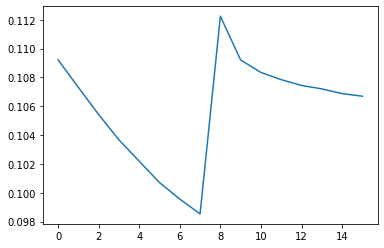

In [104]:
with torch.no_grad():
  print('train loss', l[-1], 'mean', simpletorch.mean(np.array(l)))
  xtt=xtt.cuda()
  ytt=ytt.cuda()
  print('train',simpletorch.testingWithCrossEntropyLossMultiTarget(
    model, xtt, ytt, [[0, 2], [2, 5], [5, 11]]))
  # print('test',simpletorch.testingWithCrossEntropyLossMultiTarget(
  #   model, xtt, ytt, [[0, 2], [2, 5], [5, 11]]))
  xtt=xtt.cpu()
  ytt=ytt.cpu()
  plt.plot(l)

In [105]:
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/model')